# 6.1 Data Cleaning

Objective: To clean the data ready for analysis

### 1. [Importing Libraries](#import_libraries)

### 2. [Import Data](#import_data)

### 3. [Data Understanding](#data_understanding)

### 4 [Data Preparation](#data_prep)

#### 4.1 [Finding Missing Values](#missing_values)

#### 4.2 [Finding Duplicates](#finding_dups)

#### 4.3 [Check for mixed Data Types](#mixed_data)

#### 4.4 [Check for inconsistencies in Columns](#incon_columns)

### 5. [Descriptive Analysis](#descriptive_analysis)

#### 5.1 [Basic Statistics](#basic_stats)

#### 5.2 [Frequency Distribution](#freq_dist)





## 1. Importing Libraries <a id='import_libraries'></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy



# 2. Import Data <a id='import_data'></a>

In [ ]:
#create a path to the folder
path = r'/content/drive/MyDrive/Careerfoundary/Section 6_University_Ranking'

In [ ]:
#import the dataset for cleaning
df_data = pd.read_csv(os.path.join(path, '02 Data', 'Original_Data', 'university_data.csv'), index_col = False)

In [ ]:
df_data.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
#all column names are intuiative

In [ ]:
#Check the shape of the data
df_data.shape

(2200, 14)

# 3. Data Understanding <a id='data_understanding'></a>

In [ ]:
# Descriptive Analysis
df_data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [ ]:
#Basic Data Summary
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


# 4. Data Preparation <a id='data_prep'></a>

# 4.1 Finding Missing Values <a id='missing_values'></a>

In [ ]:
df_data.isnull().sum()

,0
world_rank,0
institution,0
country,0
national_rank,0
quality_of_education,0
alumni_employment,0
quality_of_faculty,0
publications,0
influence,0
citations,0


In [ ]:
# We can see there are 200 null values in the broad_impact column.
# As this means that 9% of the data in this column is null and when looking at the data source,
# we only have data for years 2014 and 2015 I will remove this column from the data set.

In [ ]:
df_data= df_data.drop(columns = ['broad_impact'])

In [ ]:
#The column has been removed
df_data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'year'],
      dtype='object')

In [ ]:
df_data.isnull().sum()
# There are now no missing values

,0
world_rank,0
institution,0
country,0
national_rank,0
quality_of_education,0
alumni_employment,0
quality_of_faculty,0
publications,0
influence,0
citations,0


In [ ]:
df_data.shape

(2200, 13)

# 4.2 Finding Duplicates <a id='finding_dups'></a>

In [ ]:
#create a dataframe for duplicates
df_dups= df_data[df_data.duplicated()]

In [ ]:
df_dups

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year


In [ ]:
# There are no duplicates in this dataset

# 4.3 Check for mixed Data types <a id='missing_data'></a>


In [ ]:
for col in df_data.columns.tolist():
    # Check if the type of each element in the column matches the type of the first element in the column
    weird = df_data[col].map(type) != type(df_data[col].iloc[0])
    if weird.any():
        print(col)

world_rank
national_rank
quality_of_education
alumni_employment
quality_of_faculty
publications
influence
citations
patents
score
year


In [ ]:
#11 out of 13 of columns have mixed data types I will correct, I will review all data types

In [ ]:
df_data.dtypes

,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


In [ ]:
int64_columns = [
    'world_rank', 'national_rank', 'quality_of_education', 'alumni_employment',
    'quality_of_faculty', 'publications', 'influence', 'citations', 'patents'
]
str_columns = ['institution', 'country']
float64_columns = ['score']
int_columns = ['year']

# Convert columns to their respective data types
df_data[int64_columns] = df_data[int64_columns].astype('int64')
df_data[str_columns] = df_data[str_columns].astype('str')
df_data[float64_columns] = df_data[float64_columns].astype('float64')
df_data[int_columns] = df_data[int_columns].astype('int')

In [ ]:
df_data.dtypes

,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


In [ ]:
df_data['institution'] = df_data['institution'].astype(str)

In [ ]:
df_data.dtypes

,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


# 4.4 Check for consistencies in the columnns <a id='incon_columns'></a>

In [ ]:
#Checking the country name column to see if the names are standardised, they look consistent.
df_data['country'].value_counts(dropna = False)

,count
country,
USA,573
China,167
Japan,159
United Kingdom,144
Germany,115
France,109
Italy,96
Spain,81
Canada,72


In [ ]:
df_data['year'].value_counts(dropna = False)

,count
year,
2014,1000
2015,1000
2012,100
2013,100


In [ ]:
# There are more rows for 2014 and 2015 which is something to note.
# It is better there are more entries in recent years than earlier years as this will be the most up to date data.

In [ ]:
df_data['institution'].value_counts(dropna = False)
#The format of University names seems standardised and consistent.

,count
institution,
Harvard University,4
Karolinska Institute,4
"University of Maryland, College Park",4
University of British Columbia,4
Brown University,4
...,...
I-Shou University,1
University of Maine (Le Mans),1
National Dong Hwa University,1


In [ ]:
# The data has now been cleaned

# 5. Descriptive Analysis <a id='descriptive_analysis'></a>

# 5.1 Basic Statistics <a id='basic_stats'></a>

In [ ]:
# Basic Statistics of the cleaned Data
df_data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000,2015.000000


# 5.2 Frequency Distribution <a id='freq_dist'></a>

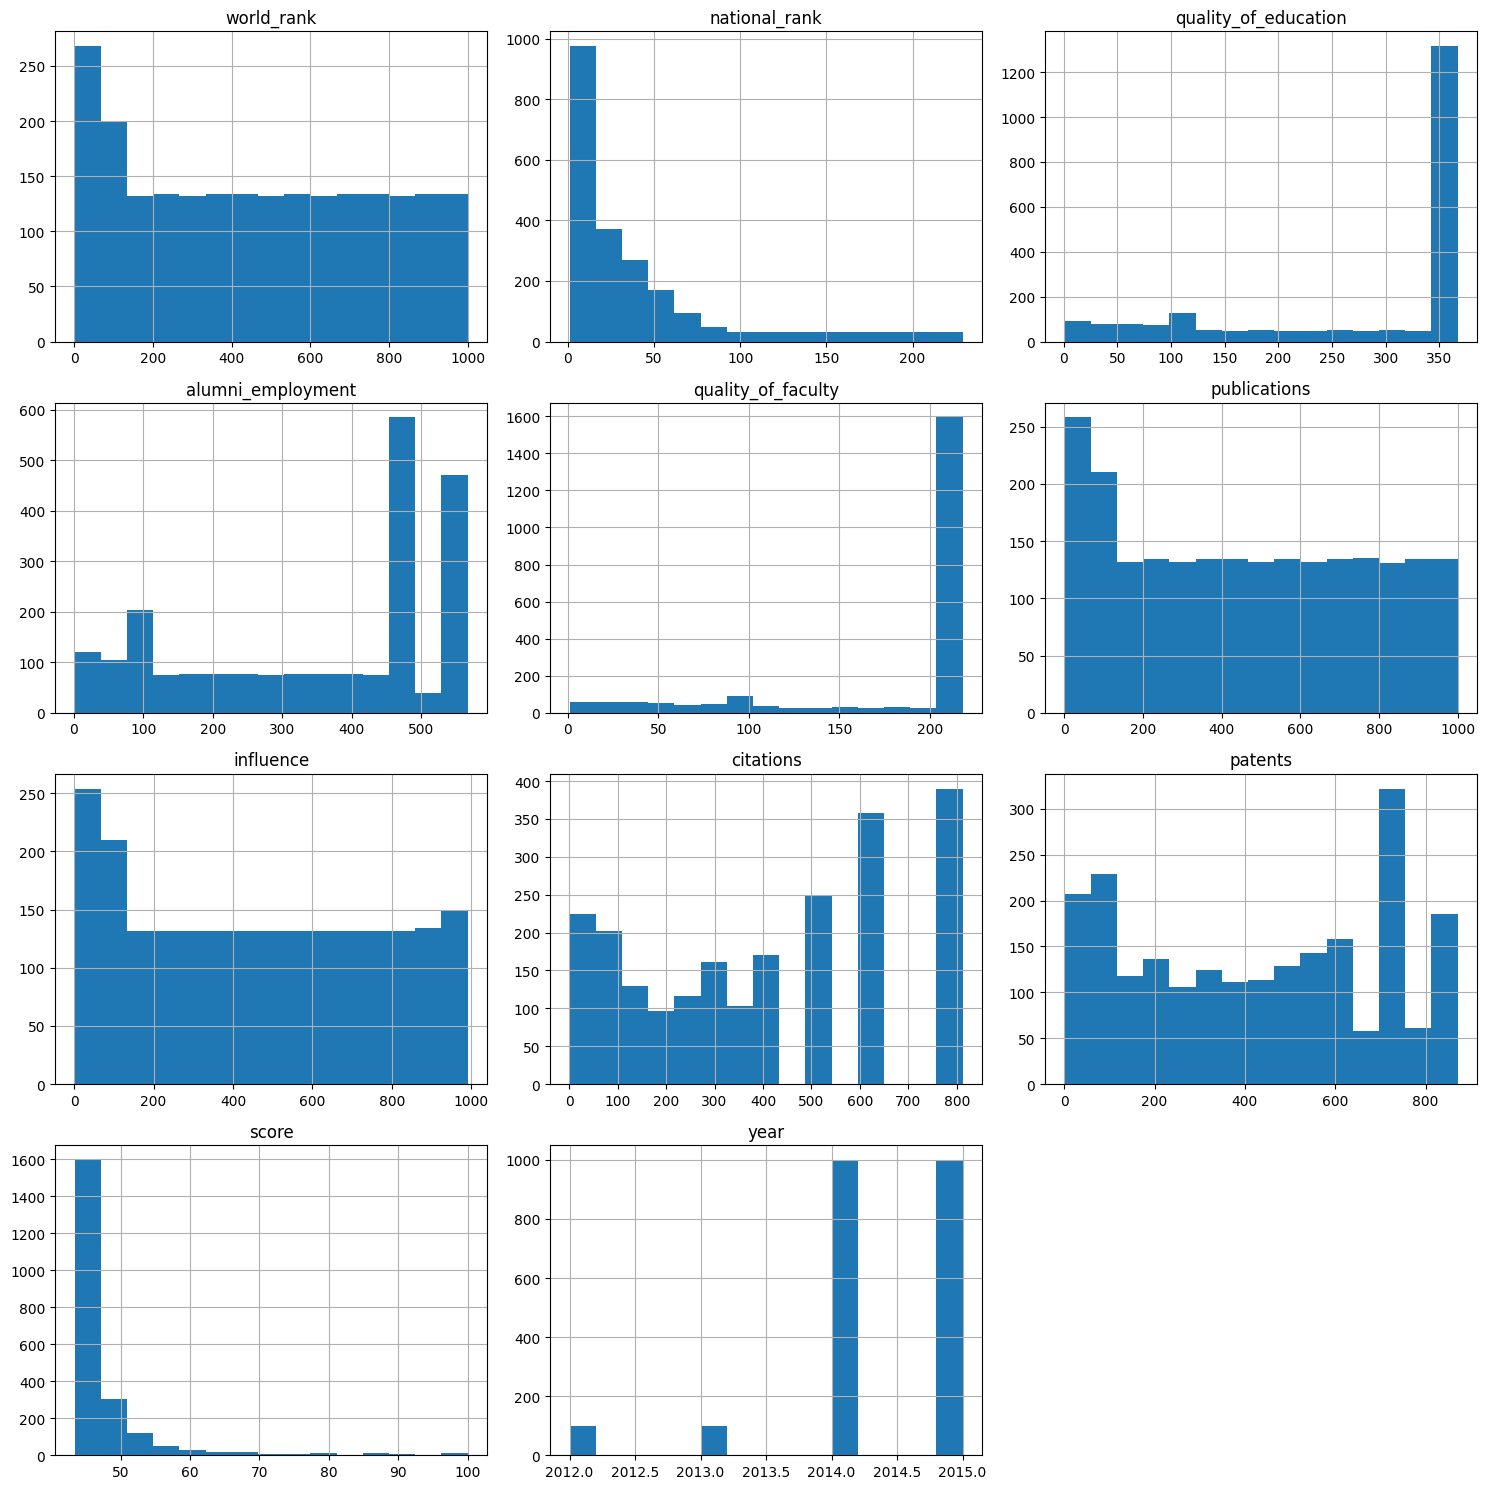

In [ ]:
# Histograms have been ploted for all
df_data.hist(bins=15, figsize=(15, 15), layout=(4, 3))
plt.tight_layout()
plt.show()

In [ ]:
# We can see for World Rank and National Rank there is a higher count of high ranking universities.

# There are signifantly more universities where the Quality of Education and Quality of Faculty on the lower end.

# Alumni employment and Patents vary and there is no obvious pattern.

# The count for Citations which shows the number of students at the university varies.

# Score is shown as a percentage, therefore we can see there is a higher count of universities on the lower end.
# This is expected at the highest percentage is likely to go to a smaller amount of universities.

# There is more data in year 2014 & 2015 than 2012 & 2013.

In [ ]:
# Export Cleaned Data
df_data.to_csv(os.path.join(path,'02 Data', 'Prepared_Data', 'df_data_cleaned.csv'))